In [313]:
import nltk
import re
from nltk.corpus import gutenberg
from operator import itemgetter 
from nltk.stem import WordNetLemmatizer
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

nltk.download('stopwords')
from nltk.corpus import stopwords
stopword_list = list(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Esra/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [308]:
def parse_document(document, sent_tokenize=False):
    document = re.sub('\n', ' ', document)
    if isinstance(document, str):
        document = document
    elif isinstance(document, unicode):
        return unicodedata.normalize(
            'NFKD', document).encode('ascii', 'ignore')
    else:
        raise ValueError('Document is not string or unicode!')
    document = document.strip()
    sentences = nltk.sent_tokenize(document)
    sentences = [sentence.strip() for sentence in sentences]

    return sentences if sent_tokenize else ' '.join(sentences)

In [209]:
# Home-made normalizer - New version for tokenization
def normalize_corpus(sent_corpus, remove_whitespace = False, remove_punc = False, 
                     remove_stopwords = True, all_lower = False, text_lemmatization = False, tokenize = False ):
    cleaned_array=[]
    lemmatizer = WordNetLemmatizer()
    for sent in sent_corpus:
        cleaned_sent = ""
        for item in nltk.word_tokenize(sent):
            if text_lemmatization == True:
                item = lemmatizer.lemmatize(item)
            if all_lower == True:
                item = item.lower() 
            if remove_punc == True:
                item = re.sub(r'[^A-Za-z0-9]','', item)
            if remove_stopwords == True and item.lower() not in stopword_list:
                cleaned_sent += item+' ' 
            elif remove_stopwords == False:
                cleaned_sent += item+' '
        if tokenize == True:   
            #print(cleaned_sent)
            cleaned_array.append(nltk.word_tokenize(cleaned_sent))
        else:
            cleaned_array.append(cleaned_sent)
    return cleaned_array

In [197]:
# load corpus
alice = gutenberg.sents(fileids='carroll-alice.txt')
alice = [' '.join(ts) for ts in alice]
norm_alice = normalize_corpus(alice, remove_punc=True, remove_stopwords=True,text_lemmatization=False)

In [198]:
alice[2:5]

['Down the Rabbit - Hole',
 "Alice was beginning to get very tired of sitting by her sister on the bank , and of having nothing to do : once or twice she had peeped into the book her sister was reading , but it had no pictures or conversations in it , ' and what is the use of a book ,' thought Alice ' without pictures or conversation ?'",
 'So she was considering in her own mind ( as well as she could , for the hot day made her feel very sleepy and stupid ), whether the pleasure of making a daisy - chain would be worth the trouble of getting up and picking the daisies , when suddenly a White Rabbit with pink eyes ran close by her .']

In [201]:
normalize_corpus(alice[2:5], remove_punc=True, remove_stopwords=True, text_lemmatization=False, tokenize = True)

[['Down', 'Rabbit', 'Hole'],
 ['Alice',
  'beginning',
  'get',
  'tired',
  'sitting',
  'sister',
  'bank',
  'nothing',
  'twice',
  'peeped',
  'book',
  'sister',
  'reading',
  'pictures',
  'conversations',
  'use',
  'book',
  'thought',
  'Alice',
  'without',
  'pictures',
  'conversation'],
 ['So',
  'considering',
  'mind',
  'well',
  'could',
  'hot',
  'day',
  'made',
  'feel',
  'sleepy',
  'stupid',
  'whether',
  'pleasure',
  'making',
  'daisy',
  'chain',
  'would',
  'worth',
  'trouble',
  'getting',
  'picking',
  'daisies',
  'suddenly',
  'White',
  'Rabbit',
  'pink',
  'eyes',
  'ran',
  'close']]

## Keyphrase Extraction

In [6]:
def flatten_corpus(corpus):
    return ' '.join([document.strip() for document in corpus]) 

In [7]:
flatten_corpus(normalize_corpus(alice, remove_punc=True,text_lemmatization=False)[2:5])

'Down the Rabbit  Hole Alice was beginning to get very tired of sitting by her sister on the bank  and of having nothing to do  once or twice she had peeped into the book her sister was reading  but it had no pictures or conversations in it   and what is the use of a book  thought Alice  without pictures or conversation So she was considering in her own mind  as well as she could  for the hot day made her feel very sleepy and stupid  whether the pleasure of making a daisy  chain would be worth the trouble of getting up and picking the daisies  when suddenly a White Rabbit with pink eyes ran close by her'

### Our Own N-grams

In [8]:
def compute_ngrams(sequence, n): 
    return zip(*[sequence[index:] for index in range(n)])

In [23]:
def get_top_ngrams(corpus, ngram_val=3, limit=5): 
    corpus = flatten_corpus(corpus) 
    tokens = nltk.word_tokenize(corpus) 
    ngrams = compute_ngrams(tokens, ngram_val) 
    ngrams_freq_dist = nltk.FreqDist(ngrams) 
    sorted_ngrams_fd = sorted(ngrams_freq_dist.items(), key=itemgetter(1), reverse=True) 
    sorted_ngrams = sorted_ngrams_fd[0:limit] 
    sorted_ngrams = [(' '.join(text), freq) for text, freq in sorted_ngrams] 
    return sorted_ngrams 

In [31]:
# applied to normalized alice corpus
get_top_ngrams(norm_alice,3,10)

[('said Mock Turtle', 20),
 ('said Alice I', 13),
 ('said March Hare', 9),
 ('I wish I', 6),
 ('thought Alice I', 6),
 ('little golden key', 5),
 ('I think I', 5),
 ('poor little thing', 5),
 ('white kid gloves', 5),
 ('I beg pardon', 5)]

In [32]:
# applied to normalized alice corpus
get_top_ngrams(norm_alice,2,10)

[('said Alice', 123),
 ('Mock Turtle', 56),
 ('March Hare', 31),
 ('said King', 29),
 ('thought Alice', 26),
 ('I think', 24),
 ('I know', 23),
 ('White Rabbit', 22),
 ('said Hatter', 22),
 ('Alice I', 21)]

### NLTK Collocations - Bigrams

In [34]:
# bigrams
from nltk.collocations import BigramCollocationFinder 
from nltk.collocations import BigramAssocMeasures 
finder = BigramCollocationFinder.from_documents([item.split() for item in norm_alice]) 
bigram_measures = BigramAssocMeasures()

In [35]:
finder.nbest(bigram_measures.raw_freq, 10) 

[('said', 'Alice'),
 ('Mock', 'Turtle'),
 ('March', 'Hare'),
 ('said', 'King'),
 ('thought', 'Alice'),
 ('I', 'think'),
 ('I', 'know'),
 ('White', 'Rabbit'),
 ('said', 'Hatter'),
 ('said', 'Mock')]

Pointwise Mutual Information: can be computed for two events or terms as the logarithm of the ratio of the probability of them occurring together by the product of their individual probabilities assuming that they are independent of each other.

In [36]:
# pointwise mutual information
finder.nbest(bigram_measures.pmi, 10) 

[('Ambition', 'Distraction'),
 ('Arithmetic', 'Ambition'),
 ('BE', 'TRUE'),
 ('BUSY', 'BEE'),
 ('Back', 'land'),
 ('Before', 'fit'),
 ('Birds', 'feather'),
 ('Carroll', '1865'),
 ('Croquet', 'Ground'),
 ('Curiouser', 'curiouser')]

### Weighted Tag Based Phrase Extraction

In [645]:
toy_text = "Elephants are large mammals of the family Elephantidae and the order Proboscidea. Two species are traditionally recognised, the African elephant and the Asian elephant. Elephants are scattered throughout sub-Saharan Africa, South Asia, and Southeast Asia. Male African elephants are the largest extant terrestrial animals. All elephants have a long trunk used for many purposes, particularly breathing, lifting water and grasping objects. Their incisors grow into tusks, which can serve as weapons and as tools for moving objects and digging. Elephants' large ear flaps helpto control their body temperature. Their pillar-like legs can carry their great weight. African elephants have larger ears and concave backs while Asian elephants have smaller ears and convex or level backs." 

In [646]:
sentences = nltk.sent_tokenize(toy_text)

In [647]:
sentences

['Elephants are large mammals of the family Elephantidae and the order Proboscidea.',
 'Two species are traditionally recognised, the African elephant and the Asian elephant.',
 'Elephants are scattered throughout sub-Saharan Africa, South Asia, and Southeast Asia.',
 'Male African elephants are the largest extant terrestrial animals.',
 'All elephants have a long trunk used for many purposes, particularly breathing, lifting water and grasping objects.',
 'Their incisors grow into tusks, which can serve as weapons and as tools for moving objects and digging.',
 "Elephants' large ear flaps help\x0bto control their body temperature.",
 'Their pillar-like legs can carry their great weight.',
 'African elephants have larger ears and concave backs while Asian elephants have smaller ears and convex or level backs.']

In [163]:
import itertools 
from gensim import corpora, models 

def get_chunks(sentences, grammar = r'NP: {<DT>? <JJ>* <NN.*>+}'):
    # build chunker based on grammar pattern
    all_chunks = []
    valid_chunks = []
    chunker = nltk.chunk.regexp.RegexpParser(grammar) 
    for sentence in sentences:
        # POS tag sentences -- added regex for removing punctuation from sentence
        punctuation_removed_sentence = re.sub(r'[^\w\s]','',sentence)
        tagged_sents = nltk.pos_tag_sents( [nltk.word_tokenize(punctuation_removed_sentence)]) 
        # extract chunks
        chunks = [chunker.parse(tagged_sent) for tagged_sent in tagged_sents] 
        # get word, pos tag, chunk tag triples 
        wtc_sents = [nltk.chunk.tree2conlltags(chunk) for chunk in chunks] 
        flattened_chunks = list( itertools.chain.from_iterable(wtc_sent for wtc_sent in wtc_sents) ) 
        # get valid chunks based on tags
        valid_chunks_tagged = [(status, [wtc for wtc in chunk]) for status, chunk in itertools.groupby(flattened_chunks,lambda word_pos_chunk: word_pos_chunk[2] != 'O')]
        # append words in each chunk to make phrases  
        valid_chunks = [" ".join(word.lower() for word, tag, chunk in wtc_group if word.lower() not in stopword_list) for status, wtc_group in valid_chunks_tagged if status] 
        # append all valid chunked phrases 
        all_chunks.append(valid_chunks) 
    return all_chunks 

In [164]:
valid_chunks = get_chunks(sentences)
valid_chunks

[['elephants', 'large mammals', 'family elephantidae', 'order proboscidea'],
 ['species', 'african elephant', 'asian elephant'],
 ['elephants', 'subsaharan africa south asia', 'southeast asia'],
 ['male african elephants', 'extant terrestrial animals'],
 ['elephants', 'long trunk', 'many purposes', 'water', 'grasping objects'],
 ['incisors', 'tusks', 'weapons', 'tools', 'objects'],
 ['elephants', 'flaps', 'body temperature'],
 ['pillarlike legs', 'great weight'],
 ['african elephants',
  'ears',
  'backs',
  'asian elephants',
  'ears',
  'convex',
  'level backs']]

In [166]:
def get_tfidf_weighted_keyphrases(sentences,grammar=r'NP: {<DT>? <JJ>* <NN.*>+}', top_n=10): 
    # get valid chunks
    valid_chunks = get_chunks(sentences, grammar=grammar)
    # build tf-idf based model
    dictionary = corpora.Dictionary(valid_chunks)
    corpus = [dictionary.doc2bow(chunk) for chunk in valid_chunks] 
    tfidf = models.TfidfModel(corpus)
    corpus_tfidf = tfidf[corpus]
    # get phrases and their tf-idf weights
    weighted_phrases = {dictionary.get(id): round(value,3) for doc in corpus_tfidf for id, value in doc} 
    weighted_phrases = sorted(weighted_phrases.items(), key=itemgetter(1), reverse=True) 
    # return top weighted phrases 
    return weighted_phrases[:top_n] 

In [169]:
# top 10 tf-idf weighted keyphrases for toy_text
get_tfidf_weighted_keyphrases(sentences_toy_text, top_n=11) 

[('extant terrestrial animals', 0.707),
 ('male african elephants', 0.707),
 ('great weight', 0.707),
 ('pillarlike legs', 0.707),
 ('southeast asia', 0.684),
 ('subsaharan africa south asia', 0.684),
 ('body temperature', 0.684),
 ('flaps', 0.684),
 ('ears', 0.667),
 ('african elephant', 0.577),
 ('asian elephant', 0.577)]

## Topic Modeling

In [232]:
toy_corpus = ["The fox jumps over the dog","The fox is very clever and quick","The dog is slow and lazy","The cat is smarter than the fox and the dog", "Python is an excellent programming language", 
              "Java and Ruby are other programming languages", "Python and Java are very popular programming languages", "Python programs are smaller than Java programs"] 

In [287]:
norm_tokenized_corpus = normalize_corpus(toy_corpus, tokenize=True) 
norm_tokenized_corpus

[['fox', 'jumps', 'dog'],
 ['fox', 'clever', 'quick'],
 ['dog', 'slow', 'lazy'],
 ['cat', 'smarter', 'fox', 'dog'],
 ['Python', 'excellent', 'programming', 'language'],
 ['Java', 'Ruby', 'programming', 'languages'],
 ['Python', 'Java', 'popular', 'programming', 'languages'],
 ['Python', 'programs', 'smaller', 'Java', 'programs']]

In [288]:
# build the dictionary
dictionary = corpora.Dictionary(norm_tokenized_corpus)

# view the dictionary mappings
print(dictionary.token2id)

# convert tokenized documents into bag of words vectors
corpus = [dictionary.doc2bow(text) for text in norm_tokenized_corpus] 
corpus

{'dog': 0, 'fox': 1, 'jumps': 2, 'clever': 3, 'quick': 4, 'lazy': 5, 'slow': 6, 'cat': 7, 'smarter': 8, 'Python': 9, 'excellent': 10, 'language': 11, 'programming': 12, 'Java': 13, 'Ruby': 14, 'languages': 15, 'popular': 16, 'programs': 17, 'smaller': 18}


[[(0, 1), (1, 1), (2, 1)],
 [(1, 1), (3, 1), (4, 1)],
 [(0, 1), (5, 1), (6, 1)],
 [(0, 1), (1, 1), (7, 1), (8, 1)],
 [(9, 1), (10, 1), (11, 1), (12, 1)],
 [(12, 1), (13, 1), (14, 1), (15, 1)],
 [(9, 1), (12, 1), (13, 1), (15, 1), (16, 1)],
 [(9, 1), (13, 1), (17, 2), (18, 1)]]

#### LSI

In [289]:
# build tf-idf feature vectors 
tfidf = models.TfidfModel(corpus) 
corpus_tfidf = tfidf[corpus] 

# fix the number of topics 
total_topics = 2 

# build the topic model
lsi =models.LsiModel(corpus_tfidf, id2word=dictionary, num_topics=total_topics) 

In [290]:
for index, topic in lsi.print_topics(total_topics): 
    print('Topic #'+str(index+1))
    print(topic)

Topic #1
-0.475*"languages" + -0.423*"programming" + -0.378*"Java" + -0.360*"popular" + -0.352*"Ruby" + -0.299*"Python" + -0.185*"excellent" + -0.185*"language" + -0.179*"programs" + -0.090*"smaller"
Topic #2
0.459*"fox" + 0.459*"dog" + 0.444*"jumps" + 0.322*"smarter" + 0.322*"cat" + 0.208*"quick" + 0.208*"clever" + 0.208*"slow" + 0.208*"lazy" + -0.000*"programs"


#### Gensim LDA

In [301]:
num_topics = 2

In [294]:
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:4]] 

[[('dog', 1), ('fox', 1), ('jumps', 1)],
 [('fox', 1), ('clever', 1), ('quick', 1)],
 [('dog', 1), ('lazy', 1), ('slow', 1)],
 [('dog', 1), ('fox', 1), ('cat', 1), ('smarter', 1)]]

In [302]:
lda_model = models.ldamodel.LdaModel(
   corpus=corpus, id2word=id2word, num_topics=num_topics, random_state=100, 
   update_every=1, chunksize=100, passes=10, alpha='auto', per_word_topics=True
)

In [306]:
for topic_id in range(lda_model.num_topics):
    topk = lda_model.show_topic(topic_id, num_topics)
    topk_words = [ w for w, _ in topk ]
    
    print('{}: {}'.format(topic_id, ' '.join(topk_words)))

0: programming Java
1: dog fox


In [303]:
lda_model.show_topic(0)

[('programming', 0.1424365),
 ('Java', 0.13394503),
 ('Python', 0.13258193),
 ('languages', 0.10178867),
 ('popular', 0.061024547),
 ('Ruby', 0.060998432),
 ('excellent', 0.060825467),
 ('language', 0.06077897),
 ('programs', 0.0284124),
 ('smaller', 0.02639916)]

In [304]:
lda_model.show_topic(1)

[('dog', 0.13677095),
 ('fox', 0.13602264),
 ('programs', 0.09032279),
 ('smarter', 0.0585769),
 ('cat', 0.058540903),
 ('lazy', 0.058518063),
 ('slow', 0.058486085),
 ('jumps', 0.058343932),
 ('quick', 0.05700811),
 ('clever', 0.056945864)]

#### Sklearn LDA

In [260]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

cv = CountVectorizer(min_df=0., max_df=1.)
cv_matrix = cv.fit_transform(toy_corpus)
cv_matrix

<8x28 sparse matrix of type '<class 'numpy.int64'>'
	with 53 stored elements in Compressed Sparse Row format>

In [229]:
lda = LatentDirichletAllocation(n_components=2, max_iter=100, random_state=0)

# Document topic distribution for cv_matrix.
dt_matrix = lda.fit_transform(cv_matrix)
features = pd.DataFrame(dt_matrix, columns=['T1', 'T2'])
features

,T1,T2
0,0.072918,0.927082
1,0.070355,0.929645
2,0.076768,0.923232
3,0.049227,0.950773
4,0.908788,0.091212
5,0.931555,0.068445
6,0.937215,0.062785
7,0.933499,0.066501


In [590]:
def plot_top_words(model, feature_names, n_top_words, n_components, title):
    fig, axes = plt.subplots(1, n_components, figsize=(12, 5), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[:-n_top_words - 1:-1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f'Topic {topic_idx +1}',
                     fontdict={'fontsize': 12})
        ax.invert_yaxis()
        ax.tick_params(axis='both', which='major', labelsize=10)
        for i in 'top right left'.split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=18)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()

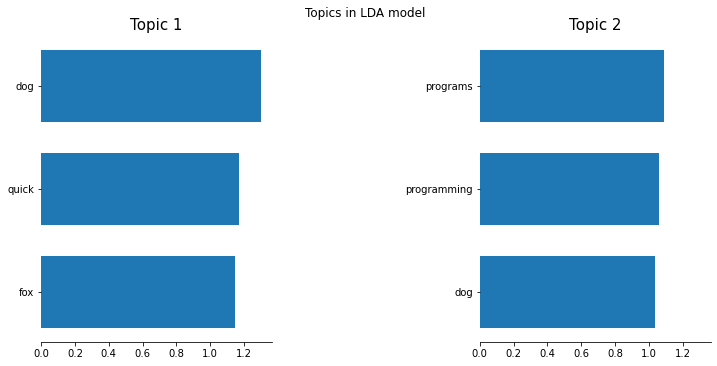

In [286]:
n_top_words = 3
n_components = 2

tf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf = tf_vectorizer.fit_transform(toy_corpus)


lda = LatentDirichletAllocation(n_components=n_components, max_iter=5,
                                learning_method='online',
                                learning_offset=50.,
                                random_state=0)
lda.fit(tfidf)



tf_feature_names = tf_vectorizer.get_feature_names()
plot_top_words(lda, tf_feature_names, n_top_words,n_components, 'Topics in LDA model')

#### NMF

In [309]:
def build_feature_matrix(documents, feature_type='frequency'):

    feature_type = feature_type.lower().strip()

    if feature_type == 'binary':
        vectorizer = CountVectorizer(binary=True, min_df=1,
                                     ngram_range=(1, 1))
    elif feature_type == 'frequency':
        vectorizer = CountVectorizer(binary=False, min_df=1,
                                     ngram_range=(1, 1))
    elif feature_type == 'tfidf':
        vectorizer = TfidfVectorizer(min_df=1,
                                     ngram_range=(1, 1))
    else:
        raise Exception(
            "Wrong feature type entered. Possible values: 'binary', 'frequency', 'tfidf'")

    feature_matrix = vectorizer.fit_transform(documents).astype(float)

    return vectorizer, feature_matrix

In [311]:
def get_topics_terms_weights(weights, feature_names):
    feature_names = np.array(feature_names)
    sorted_indices = np.array([list(row[::-1])
                               for row
                               in np.argsort(np.abs(weights))])
    sorted_weights = np.array([list(wt[index])
                               for wt, index
                               in zip(weights, sorted_indices)])
    sorted_terms = np.array([list(feature_names[row])
                             for row
                             in sorted_indices])

    topics = [np.vstack((terms.T,
                         term_weights.T)).T
              for terms, term_weights
              in zip(sorted_terms, sorted_weights)]

    return topics


In [315]:
def print_topics_udf(topics, total_topics=1,
                     weight_threshold=0.0001,
                     display_weights=False,
                     num_terms=None):

    for index in range(total_topics):
        topic = topics[index]
        topic = [(term, float(wt))
                 for term, wt in topic]
        topic = [(word, round(wt, 2))
                 for word, wt in topic
                 if abs(wt) >= weight_threshold]

        if display_weights:
            print('Topic #' + str(index + 1) + ' with weights')
            print(topic[:num_terms] if num_terms else topic)
        else:
            print('Topic #' + str(index + 1) + ' without weights')
            tw = [term for term, wt in topic]
            print(tw[:num_terms] if num_terms else tw)
        print()

In [316]:
from sklearn.decomposition import NMF

# build tf-idf document-term matrix
norm_corpus = normalize_corpus(toy_corpus)
vectorizer, tfidf_matrix = build_feature_matrix(norm_corpus, feature_type='tfidf') 

# build topic model
total_topics = 2
nmf = NMF(n_components=total_topics, random_state=42, alpha=.1, l1_ratio=.5) 
nmf.fit(tfidf_matrix) 

# get terms and their weights
feature_names = vectorizer.get_feature_names() 
weights = nmf.components_ 
topics = get_topics_terms_weights(weights, feature_names) 
print_topics_udf(topics=topics, total_topics=total_topics, num_terms=None, display_weights=True) 


Topic #1 with weights
[('programming', 0.51), ('languages', 0.46), ('java', 0.45), ('python', 0.36), ('popular', 0.26), ('ruby', 0.26), ('language', 0.14), ('excellent', 0.14), ('programs', 0.13), ('smaller', 0.05)]

Topic #2 with weights
[('dog', 0.57), ('fox', 0.57), ('jumps', 0.35), ('smarter', 0.26), ('cat', 0.26), ('quick', 0.13), ('slow', 0.13), ('clever', 0.13), ('lazy', 0.13)]



C:\Users\Esra\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "


In [317]:
tfidf_matrix

<8x19 sparse matrix of type '<class 'numpy.float64'>'
	with 30 stored elements in Compressed Sparse Row format>

### Automated Document Summarization

In [318]:
from scipy.sparse.linalg import svds


def low_rank_svd(matrix, singular_count=2):

    u, s, vt = svds(matrix, k=singular_count)
    return u, s, vt

In [320]:
toy_text = """Elephants are large mammals of the family Elephantidae and the order Proboscidea. Two species are traditionally recognised, the African elephant and the Asian elephant. Elephants are scattered throughout sub-Saharan Africa, South Asia, and Southeast Asia. Male African elephants are the largest extant terrestrial animals. All elephants have a long trunk used for many purposes,particularly breathing, lifting water and grasping objects. Their incisors grow into tusks, which can serve as weapons and as tools for moving objects and digging. Elephants' large ear flaps helpto control their body temperature. Their pillar-like legs can carry their great weight. African elephants have larger ears and concave backs while Asian elephants have smaller ears 
and convex or level backs. """ 


In [581]:
# I downloaded summarization package seperately and has_pattern function to utils.py but still got error.

#from gensim.summarization.summarizer import summarize
#from gensim.summarization import keywords

#def text_summarization_gensim(text, summary_ratio=0.5): 
#    summary = summarize(text, split=True, ratio=summary_ratio) 
#    for sentence in summary: 
#        print(sentence) 

#### LSA

In [358]:
def lsa_text_summarizer(documents, num_sentences=2, num_topics=2, feature_type='frequency', sv_threshold=0.5): 
    vec, dt_matrix = build_feature_matrix(documents, feature_type=feature_type) 
    td_matrix = dt_matrix.transpose()
    td_matrix = td_matrix.multiply(td_matrix > 0) 
    u, s, vt = low_rank_svd(td_matrix, singular_count=num_topics) 
    min_sigma_value = max(s) * sv_threshold
    s[s < min_sigma_value] = 0 
    salience_scores = np.sqrt(np.dot(np.square(s), np.square(vt))) 
    top_sentence_indices = salience_scores.argsort()[-num_sentences:][::-1] 
    top_sentence_indices.sort() 
    for index in top_sentence_indices: 
        print(sentences[index])


In [365]:
top_sentence_indices = lsa_text_summarizer(toy_corpus)
print(top_sentence_indices)

Male African elephants are the largest extant terrestrial animals.
Elephants' large ear flaps helpto control their body temperature.
None


#### Text Rank

In [394]:
# the one with elephants
sentences = nltk.sent_tokenize(toy_text)
norm_sentences = normalize_corpus(sentences, tokenize=False, remove_stopwords =False, remove_punc = False) 
norm_sentences

['Elephants are large mammals of the family Elephantidae and the order Proboscidea . ',
 'Two species are traditionally recognised , the African elephant and the Asian elephant . ',
 'Elephants are scattered throughout sub-Saharan Africa , South Asia , and Southeast Asia . ',
 'Male African elephants are the largest extant terrestrial animals . ',
 'All elephants have a long trunk used for many purposes , particularly breathing , lifting water and grasping objects . ',
 'Their incisors grow into tusks , which can serve as weapons and as tools for moving objects and digging . ',
 "Elephants ' large ear flaps helpto control their body temperature . ",
 'Their pillar-like legs can carry their great weight . ',
 'African elephants have larger ears and concave backs while Asian elephants have smaller ears and convex or level backs . ']

In [395]:
import networkx 
# define number of sentences in final summary 
num_sentences = len(norm_sentences)

# construct weighted document term matrix
vec, dt_matrix = build_feature_matrix(norm_sentences, feature_type='tfidf') 
# construct the document similarity matrix 
similarity_matrix = (dt_matrix * dt_matrix.T)
# view the document similarity matrix
print(np.round(similarity_matrix.todense(), 2) )


[[1.   0.26 0.09 0.22 0.05 0.04 0.11 0.   0.07]
 [0.26 1.   0.06 0.23 0.02 0.04 0.   0.   0.11]
 [0.09 0.06 1.   0.08 0.04 0.04 0.03 0.   0.07]
 [0.22 0.23 0.08 1.   0.03 0.   0.04 0.   0.09]
 [0.05 0.02 0.04 0.03 1.   0.13 0.03 0.   0.15]
 [0.04 0.04 0.04 0.   0.13 1.   0.05 0.14 0.06]
 [0.11 0.   0.03 0.04 0.03 0.05 1.   0.13 0.04]
 [0.   0.   0.   0.   0.   0.14 0.13 1.   0.  ]
 [0.07 0.11 0.07 0.09 0.15 0.06 0.04 0.   1.  ]]


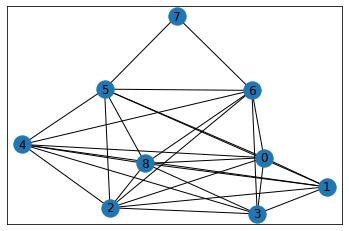

In [396]:
similarity_graph = networkx.from_scipy_sparse_matrix(similarity_matrix) 
networkx.draw_networkx(similarity_graph)

In [397]:
# compute pagerank scores for all the sentences 
scores = networkx.pagerank(similarity_graph) 

# rank sentences based on their scores 
ranked_sentences = sorted(((score, index) for index, score in scores.items()), reverse=True) 

ranked_sentences 

[(0.12500482704001215, 0),
 (0.1168215108708293, 1),
 (0.11502602327793542, 3),
 (0.11273547926920577, 8),
 (0.11099397016943623, 5),
 (0.10737222008189808, 6),
 (0.10625010342893965, 4),
 (0.10326878492269577, 2),
 (0.1025270809390475, 7)]

In [398]:
# get the top sentence indices for our summary 
top_sentence_indices = [ranked_sentences[index][1] for index in range(num_sentences)] 

print(top_sentence_indices)

[0, 1, 3, 8, 5, 6, 4, 2, 7]


In [401]:
for index in top_sentence_indices: 
    print(sentences[index])

Elephants are large mammals of the family Elephantidae and the order Proboscidea.
Two species are traditionally recognised, the African elephant and the Asian elephant.
Male African elephants are the largest extant terrestrial animals.
African elephants have larger ears and concave backs while Asian elephants have smaller ears 
and convex or level backs.
Their incisors grow into tusks, which can serve as weapons and as tools for moving objects and digging.
Elephants' large ear flaps helpto control their body temperature.
All elephants have a long trunk used for many purposes,particularly breathing, lifting water and grasping objects.
Elephants are scattered throughout sub-Saharan Africa, South Asia, and Southeast Asia.
Their pillar-like legs can carry their great weight.


## Exercise1 - TextRank and T5

Compute a text summarization for selected parts (§s, chapters) of a book from the NLTK corpus (e.g., Moby Dick) with different methods (e.g., Textrank and T5, then compare results. https://huggingface.co/transformers/model_doc/t5.html)

In [636]:
austen_sents = gutenberg.sents(fileids=['austen-emma.txt',  'austen-persuasion.txt', 'austen-sense.txt'])
austen_corpus = [" ".join(word) for word in austen_sents]

In [644]:
austen_corpus[0:3]

['[ Emma by Jane Austen 1816 ]', 'VOLUME I', 'CHAPTER I']

In [637]:
nltk.corpus.gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [638]:
normalize_austen_corpus = normalize_corpus(austen_corpus, remove_punc = True, remove_stopwords=True)
normalize_austen_corpus

[' Emma Jane Austen 1816  ',
 'VOLUME ',
 'CHAPTER ',
 'Emma Woodhouse  handsome  clever  rich  comfortable home happy disposition  seemed unite best blessings existence  lived nearly twenty  one years world little distress vex  ',
 'youngest two daughters affectionate  indulgent father   consequence sister  marriage  mistress house early period  ',
 'mother died long ago indistinct remembrance caresses  place supplied excellent woman governess  fallen little short mother affection  ',
 'Sixteen years Miss Taylor Mr  Woodhouse  family  less governess friend  fond daughters  particularly Emma  ',
 'intimacy sisters  ',
 'Even Miss Taylor ceased hold nominal office governess  mildness temper hardly allowed impose restraint  shadow authority long passed away  living together friend friend mutually attached  Emma liked  highly esteeming Miss Taylor  judgment  directed chiefly  ',
 'real evils  indeed  Emma  situation power rather much way  disposition think little well  disadvantages threa

In [639]:
len(austen_corpus)

16498

### Text Rank

In [417]:
# Process for Austen Emma Text
num_sentences = 9

# construct weighted document term matrix
vec, dt_matrix = build_feature_matrix(normalize_austen_corpus, feature_type='tfidf') 

# construct the document similarity matrix 
similarity_matrix = (dt_matrix * dt_matrix.T)

# view the document similarity matrix
print(np.round(similarity_matrix.todense(), 2) )

[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


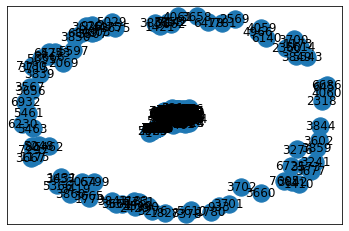

In [418]:
similarity_graph = networkx.from_scipy_sparse_matrix(similarity_matrix) 
networkx.draw_networkx(similarity_graph)

In [419]:
# compute pagerank scores for all the sentences 
scores = networkx.pagerank(similarity_graph) 

# rank sentences based on their scores 
ranked_sentences = sorted(((score, index) for index, score in scores.items()), reverse=True) 

ranked_sentences 

ERROR: Could not install packages due to an OSError: [WinError 5] Erişim engellendi: 'C:\\Users\\Esra\\anaconda3\\Lib\\site-packages\\numpy\\~ore\\_multiarray_tests.cp38-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



[(0.000429640507605083, 3380),
 (0.00042711543691865896, 465),
 (0.0004018970907820401, 106),
 (0.0003851774716122369, 7481),
 (0.00038383016085729774, 6437),
 (0.0003687954222914754, 7477),
 (0.00036310818091446164, 1578),
 (0.0003553122870309428, 3689),
 (0.00035517585441153555, 6832),
 (0.00034785287903571065, 6599),
 (0.000347320623408852, 4649),
 (0.00034303184480005683, 6365),
 (0.00034125072915799253, 127),
 (0.0003404721844812192, 419),
 (0.00033732008231456603, 1089),
 (0.0003372673435765385, 3698),
 (0.00033638503703680084, 297),
 (0.0003334310150381138, 2202),
 (0.00033314883473160666, 5287),
 (0.000330362249140031, 6296),
 (0.00032906754928863313, 7631),
 (0.000325777825149274, 5285),
 (0.0003227553220427977, 3413),
 (0.0003198662530245931, 5745),
 (0.0003193679550790466, 4029),
 (0.0003189724438708401, 3421),
 (0.0003186090107351595, 329),
 (0.000318390569271932, 1396),
 (0.00031720383853181484, 2331),
 (0.00031553092734231124, 6306),
 (0.00031497634452518796, 2675),
 (0.0

In [427]:
# get the top sentence indices for our summary 
top_sentence_indices = [ranked_sentences[index][1] for index in range(num_sentences)] 

print(top_sentence_indices)

for index in top_sentence_indices: 
    print(austen_corpus[index],'\n')

[3380, 465, 106, 7481, 6437, 7477, 1578, 3689, 6832]
" Dear Mrs . Weston , how could you think of such a thing ?-- Mr . 

" I do not know what your opinion may be , Mrs . Weston ," said Mr . Knightley , " of this great intimacy between Emma and Harriet Smith , but I think it a bad thing ." 

Mr . Knightley , in fact , was one of the few people who could see faults in Emma Woodhouse , and the only one who ever told her of them : and though this was not particularly agreeable to Emma herself , she knew it would be so much less so to her father , that she would not have him really suspect such a circumstance as her not being thought perfect by every body . 

Mr . Woodhouse could not be soon reconciled ; but the worst was overcome , the idea was given ; time and continual repetition must do the rest .-- To Emma ' s entreaties and assurances succeeded Mr . Knightley ' s , whose fond praise of her gave the subject even a kind of welcome ; and he was soon used to be talked to by each , on eve

#### T5

In [430]:
import torch
from transformers import AutoTokenizer, AutoModelWithLMHead

In [431]:
tokenizer = AutoTokenizer.from_pretrained('t5-base')
model = AutoModelWithLMHead.from_pretrained('t5-base', return_dict=True)

Downloading:   0%|          | 0.00/1.20k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/792k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

C:\Users\Esra\anaconda3\lib\site-packages\transformers\models\auto\modeling_auto.py:806: FutureWarning: The class `AutoModelWithLMHead` is deprecated and will be removed in a future version. Please use `AutoModelForCausalLM` for causal language models, `AutoModelForMaskedLM` for masked language models and `AutoModelForSeq2SeqLM` for encoder-decoder models.
  warnings.warn(


Downloading:   0%|          | 0.00/892M [00:00<?, ?B/s]

In [570]:
# to get as a string
text = austen_sents = gutenberg.raw('austen-emma.txt')
preprocess_text = text.strip().replace("\n","")
preprocess_text = preprocess_text.replace("\\",'')

In [571]:
#preprocess_text

'[Emma by Jane Austen 1816]VOLUME ICHAPTER IEmma Woodhouse, handsome, clever, and rich, with a comfortable homeand happy disposition, seemed to unite some of the best blessingsof existence; and had lived nearly twenty-one years in the worldwith very little to distress or vex her.She was the youngest of the two daughters of a most affectionate,indulgent father; and had, in consequence of her sister\'s marriage,been mistress of his house from a very early period.  Her motherhad died too long ago for her to have more than an indistinctremembrance of her caresses; and her place had been suppliedby an excellent woman as governess, who had fallen little shortof a mother in affection.Sixteen years had Miss Taylor been in Mr. Woodhouse\'s family,less as a governess than a friend, very fond of both daughters,but particularly of Emma.  Between _them_ it was more the intimacyof sisters.  Even before Miss Taylor had ceased to hold the nominaloffice of governess, the mildness of her temper had hard

In [572]:
tokenized_text = tokenizer.encode(preprocess_text,
                          return_tensors='pt',
                          max_length=5120,
                          truncation=True)

In [573]:
summary_ids = model.generate(
            tokenized_text,
            max_length=150, 
            num_beams=2,
            repetition_penalty=2.5, 
            length_penalty=1.0, 
            early_stopping=True
        )

In [574]:
output = tokenizer.decode(summary_ids[0], skip_special_tokens=True)

In [575]:
print ("\n\nSummarized text: \n",output)



Summarized text: 
 a little too much of her own. She was very affectionate, but she had never met him in conversation. "I am sure she will be an excellent servant," said Mr. Knightley. "You know, Emma, you have made the match myself.""Oh dear, sir! I do not think that you can say anything about me; but it is all a joke!" "Well, my dearest papa, we must go to Hartfield and see Miss Taylor. We are going to see her soon.""And when they


## Exercise 2 LDA Mallet and LDA

#bigger corpus -- ok (3 Austen Text)
#pos tagging 
#content words
#word clouds

In [514]:
# pip install gensim==3.8.3

In [686]:
# normalize and tokenize txt file
normalized_austen_big_corpus = normalize_corpus(austen_corpus, remove_punc = True)

In [730]:
#PP: {(<PRP.*>)}
grammar = r""" 
Adj: {<JJ.*>}
Adv: {<RB.*>}
N: {<NN.*>}
V: {<VB.*>} 
"""
    # build chunker based on grammar pattern
all_content_words = []
chunker = nltk.chunk.regexp.RegexpParser(grammar) 
for sentence in normalized_austen_big_corpus:
    # POS tag sentences -- added regex for removing punctuation from sentence
    punctuation_removed_sentence = re.sub(r'[^\w\s]','',sentence)
    tagged_sents = nltk.pos_tag_sents( [nltk.word_tokenize(punctuation_removed_sentence)])
    all_content_words.append([item[0] for sents in tagged_sents for item in sents])

In [731]:
all_content_words[0:5]

[['Emma', 'Jane', 'Austen', '1816'],
 ['VOLUME'],
 ['CHAPTER'],
 ['Emma',
  'Woodhouse',
  'handsome',
  'clever',
  'rich',
  'comfortable',
  'home',
  'happy',
  'disposition',
  'seemed',
  'unite',
  'best',
  'blessings',
  'existence',
  'lived',
  'nearly',
  'twenty',
  'one',
  'years',
  'world',
  'little',
  'distress',
  'vex'],
 ['youngest',
  'two',
  'daughters',
  'affectionate',
  'indulgent',
  'father',
  'consequence',
  'sister',
  'marriage',
  'mistress',
  'house',
  'early',
  'period']]

In [747]:
# build the dictionary
dictionary_austen = corpora.Dictionary(all_content_words)

# convert tokenized documents into bag of words vectors
corpus_austen = [dictionary_austen.doc2bow(text) for text in all_content_words] 


In [748]:
import os
from gensim.models.wrappers import LdaMallet

os.environ.update({'MALLET_HOME':r'C:/mallet/mallet-2.0.8/'})
mallet_path = r'C:/mallet/mallet-2.0.8/bin/mallet.bat'

n_topics = 4

lda_mallet = LdaMallet(
        mallet_path,
        corpus = corpus_austen,
        num_topics = n_topics,
        id2word = dictionary_austen,
    )

In [694]:
# pip install wordcloud

In [749]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))
    fig = plt.figure(1, figsize=(8, 8))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=14)
        fig.subplots_adjust(top=2.3)
    plt.imshow(wordcloud)


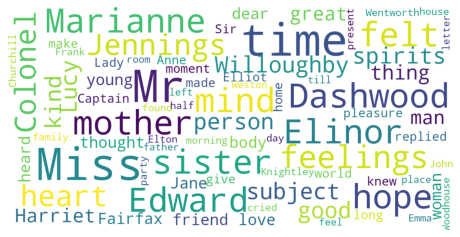

In [751]:
show_wordcloud(lda_mallet.print_topics(num_topics=0, num_words=20))

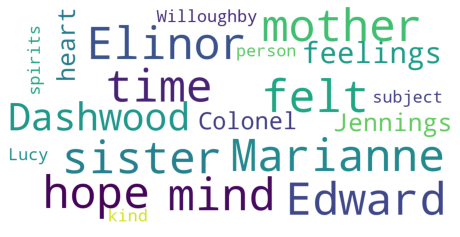

In [752]:
show_wordcloud(lda_mallet.print_topics(num_topics=1, num_words=20))

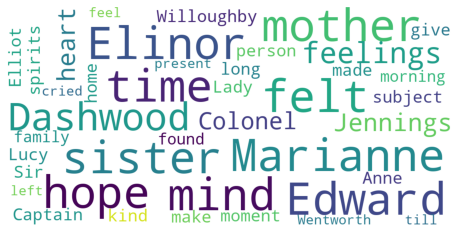

In [753]:
show_wordcloud(lda_mallet.print_topics(num_topics=2, num_words=20))

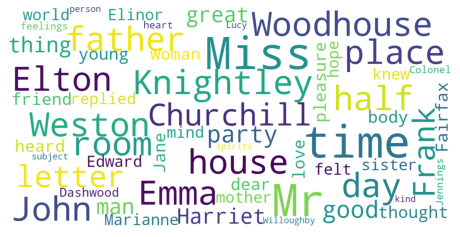

In [754]:
show_wordcloud(lda_mallet.print_topics(num_topics=3, num_words=20))

#### LDA

In [627]:
from gensim.test.utils import common_texts
from gensim.corpora.dictionary import Dictionary
import gensim


LdaModel = gensim.models.ldamodel.LdaModel(corpus=corpus_austen,
                                           id2word=dictionary_austen,  
                                           num_topics=n_topics,  
                                           random_state=100,
                                           update_every=1,
                                           chunksize=10,
                                           passes=10,
                                           alpha='symmetric',
                                           iterations=100,
                                           per_word_topics=True)

# Train the model on the corpus.
lda_topics = LdaModel[corpus_austen]

In [628]:
for i,topic in LdaModel.show_topics(formatted=True, num_topics=n_topics, num_words=10):
    print(str(i)+": "+ topic)
    print()

0: 0.053*"would" + 0.032*"Harriet" + 0.018*"happiness" + 0.018*"see" + 0.016*"always" + 0.016*"first" + 0.014*"day" + 0.013*"might" + 0.013*"true" + 0.012*"Robert"

1: 0.028*"must" + 0.021*"one" + 0.017*"little" + 0.015*"good" + 0.013*"hope" + 0.013*"well" + 0.013*"could" + 0.012*"Hartfield" + 0.012*"sure" + 0.011*"happy"

2: 0.056*"Mr" + 0.029*"Knightley" + 0.026*"could" + 0.024*"Mrs" + 0.018*"every" + 0.016*"Miss" + 0.016*"Woodhouse" + 0.016*"Weston" + 0.015*"time" + 0.015*"never"

3: 0.054*"Emma" + 0.020*"much" + 0.019*"think" + 0.019*"said" + 0.017*"know" + 0.013*"quite" + 0.012*"Jane" + 0.012*"say" + 0.012*"indeed" + 0.010*"great"



### Coherence Model

In [599]:
from gensim.models.coherencemodel import CoherenceModel

cm = CoherenceModel(model=LdaModel, corpus=corpus_austen, coherence='u_mass')
coherence = cm.get_coherence()  # get coherence value
coherence

-6.501411631339814

In [610]:
num_topic_list = np.arange(2,10,2)
for num in num_topic_list:
    LdaModel = gensim.models.ldamodel.LdaModel(corpus=corpus_austen,
                                           id2word=dictionary_austen,  
                                           num_topics=num,  
                                           random_state=100,
                                           update_every=1,
                                           chunksize=10,
                                           passes=10,
                                           alpha='symmetric',
                                           iterations=100,
                                           per_word_topics=True)
    cm = CoherenceModel(model=LdaModel, corpus=corpus_austen, coherence='u_mass') # 0 is the best coherence value
    coherence = cm.get_coherence()  # get coherence value
    print('Num of topics: ', num, ' | ', 'Coherence value:', coherence)    

Num of topics:  2  |  Coherence value: -3.2363531743557266
Num of topics:  4  |  Coherence value: -5.157782211427958
Num of topics:  6  |  Coherence value: -6.501411631339814
Num of topics:  8  |  Coherence value: -8.008433363989358


In [612]:
num_topic_list = np.arange(2,10,2)
for num in num_topic_list:
    lda_mallet = LdaMallet(
        mallet_path,
        corpus = corpus_austen,
        num_topics = num,
        id2word = dictionary_austen,
    )
    cm = CoherenceModel(model=lda_mallet, corpus=corpus_austen, coherence='u_mass') # 0 is the best coherence value
    coherence = cm.get_coherence()  # get coherence value
    print('Num of topics: ', num, ' | ', 'Coherence value:', coherence)   

Num of topics:  2  |  Coherence value: -3.3470318403276407
Num of topics:  4  |  Coherence value: -4.641678596861213
Num of topics:  6  |  Coherence value: -6.060630244947673
Num of topics:  8  |  Coherence value: -7.184999733160929


#### NMF

In [588]:
from sklearn.decomposition import NMF

# build tf-idf document-term matrix
# normalize and tokenize txt file
normalized_austen_corpus = normalize_corpus(austen_corpus, tokenize = False, remove_punc = True, remove_stopwords=True)

norm_corpus = normalize_corpus(normalized_austen_corpus)
vectorizer, tfidf_matrix = build_feature_matrix(norm_corpus, feature_type='tfidf') 

# build topic model
total_topics = 6
nmf = NMF(n_components=total_topics, random_state=42, alpha=.1, l1_ratio=.5) 
nmf.fit(tfidf_matrix) 

# get terms and their weights
feature_names = vectorizer.get_feature_names() 
weights = nmf.components_ 
topics = get_topics_terms_weights(weights, feature_names) 
print_topics_udf(topics=topics, total_topics=total_topics, num_terms=None, display_weights=True) 

C:\Users\Esra\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "


Topic #1 with weights
[('oh', 5.21), ('yes', 0.06), ('dear', 0.02), ('difference', 0.01), ('sorry', 0.01), ('short', 0.01), ('told', 0.01), ('churchill', 0.01), ('richard', 0.01), ('cried', 0.0), ('next', 0.0), ('letter', 0.0), ('papa', 0.0), ('recollect', 0.0), ('answer', 0.0), ('comfortable', 0.0), ('patty', 0.0), ('indignantly', 0.0)]

Topic #2 with weights
[('would', 2.05), ('could', 1.42), ('well', 1.33), ('must', 1.17), ('think', 1.13), ('thing', 1.11), ('know', 1.04), ('harriet', 0.92), ('never', 0.88), ('much', 0.82), ('every', 0.81), ('one', 0.81), ('good', 0.74), ('say', 0.73), ('sure', 0.7), ('indeed', 0.63), ('shall', 0.59), ('quite', 0.53), ('thought', 0.51), ('see', 0.5), ('body', 0.46), ('always', 0.45), ('might', 0.44), ('little', 0.44), ('better', 0.43), ('time', 0.43), ('nothing', 0.42), ('great', 0.41), ('like', 0.4), ('man', 0.37), ('may', 0.36), ('ever', 0.35), ('wish', 0.34), ('jane', 0.34), ('yes', 0.33), ('without', 0.33), ('done', 0.31), ('rather', 0.31), ('soo

### Sklearn LDA

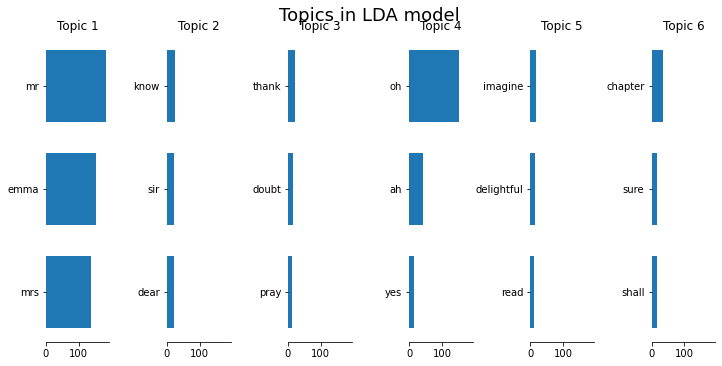

In [591]:
n_top_words = 3
n_components = 6

tf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf = tf_vectorizer.fit_transform(normalized_austen_corpus)


lda = LatentDirichletAllocation(n_components=n_components, max_iter=5,
                                learning_method='online',
                                learning_offset=50.,
                                random_state=0)
lda.fit(tfidf)



tf_feature_names = tf_vectorizer.get_feature_names()
plot_top_words(lda, tf_feature_names, n_top_words,n_components, 'Topics in LDA model')